## Read in Data

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from KNNClassifier import KNNClassifier

# read in the data - classic Iris dataset
df = pd.read_csv('C:/Users/spenc/Documents/Data Annotation/Project Codex/Data/iris.csv',  header = None)

df.columns = ['x1', 'x2', 'x3', 'x4', 'category']
print(df.head())
print(df.info())

    x1   x2   x3   x4     category
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x1        150 non-null    float64
 1   x2        150 non-null    float64
 2   x3        150 non-null    float64
 3   x4        150 non-null    float64
 4   category  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


## Preprocess Data

In [5]:
np.random.seed(100) # for reproducibility

# train/test split, stratified by flower category
train, test = train_test_split(df, test_size = 0.2, stratify = df['category'])

# split datasets by input/output
X_train = train.iloc[:, 0:4]
y_train = train.iloc[:, -1]

X_test = test.iloc[:, 0:4]
y_test = test.iloc[:, -1]

# label encoding
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)

y_test_encoded = label_encoder.fit_transform(y_test)

# Center and scale data
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Fitting

In [7]:
from sklearn import metrics

# initialize the model object with k=5
knn_classifier = KNNClassifier(k = 2)

# train model 
knn_classifier.fit(X_train_scaled, y_train_encoded)

yhat_train_encoded = knn_classifier.predict(X_train_scaled)
yhat_test_encoded = knn_classifier.predict(X_test_scaled)

In [8]:
# In sample
y_true = y_train_encoded
y_pred = yhat_train_encoded

metrics.confusion_matrix(y_true, y_pred)

array([[40,  0,  0],
       [ 0, 38,  2],
       [ 0,  0, 40]], dtype=int64)

In [9]:
# Out of sample
y_true = y_test_encoded
y_pred = yhat_test_encoded

metrics.confusion_matrix(y_true, y_pred)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  3,  7]], dtype=int64)

## Model Performance Assessment

In [11]:
import seaborn as sb

k_values = range(1, 31)
in_sample_acc = []
out_sample_acc = []
for val in k_values:
    # initialize the model object with k=val
    knn_classifier = KNNClassifier(k = val)
    # train model 
    knn_classifier.fit(X_train_scaled, y_train_encoded)
    yhat_train_encoded = knn_classifier.predict(X_train_scaled)
    yhat_test_encoded = knn_classifier.predict(X_test_scaled)

    # in sample accuracy
    y_true = y_train_encoded
    y_pred = yhat_train_encoded

    conf_mat = metrics.confusion_matrix(y_true, y_pred)
    in_sample_acc.append(np.trace(conf_mat) / len(y_train))

    # out of sample accuracy
    y_true = y_test_encoded
    y_pred = yhat_test_encoded

    conf_mat = metrics.confusion_matrix(y_true, y_pred)
    out_sample_acc.append(np.trace(conf_mat) / len(y_test))

c:\Users\spenc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\spenc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


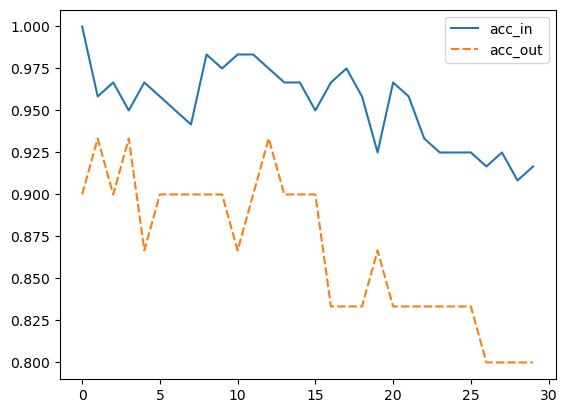

In [12]:
# save evaluation data as a dictionary
eval_data = {
    "k": k_values,
    "acc_in": in_sample_acc,
    "acc_out": out_sample_acc,
}

# convert dictionary to DataFrame
eval_df = pd.DataFrame(eval_data)

# line charts 
perf_plot = sb.lineplot(eval_df.iloc[:, 1:3])

In [13]:
print(eval_df)

     k    acc_in   acc_out
0    1  1.000000  0.900000
1    2  0.958333  0.933333
2    3  0.966667  0.900000
3    4  0.950000  0.933333
4    5  0.966667  0.866667
5    6  0.958333  0.900000
6    7  0.950000  0.900000
7    8  0.941667  0.900000
8    9  0.983333  0.900000
9   10  0.975000  0.900000
10  11  0.983333  0.866667
11  12  0.983333  0.900000
12  13  0.975000  0.933333
13  14  0.966667  0.900000
14  15  0.966667  0.900000
15  16  0.950000  0.900000
16  17  0.966667  0.833333
17  18  0.975000  0.833333
18  19  0.958333  0.833333
19  20  0.925000  0.866667
20  21  0.966667  0.833333
21  22  0.958333  0.833333
22  23  0.933333  0.833333
23  24  0.925000  0.833333
24  25  0.925000  0.833333
25  26  0.925000  0.833333
26  27  0.916667  0.800000
27  28  0.925000  0.800000
28  29  0.908333  0.800000
29  30  0.916667  0.800000
